In [2]:
#importing all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

from sklearn import model_selection as mdsel
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
#loading the dataset
faults=pd.read_csv('train_dataset.csv')
faults.head() #to know what our dataset looks like

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,0,0,0,0,-25.966805,-8.276645,30.787902,0.522009,-0.490543,-0.031466,5
1,1,0,0,1,827.929307,65.235107,-14.917177,-0.181270,-0.008740,0.190010,3
2,0,0,0,0,-26.291415,92.247084,-68.853681,-0.616093,0.276685,0.339408,5
3,1,0,1,1,849.642844,-273.265642,25.528055,0.027473,-0.338933,0.311460,2
4,0,0,0,0,-48.676854,95.332992,-49.778235,-0.551966,0.048705,0.503261,5


In [5]:
#Beginning data exploration
#checking shape
faults.shape 

(3930, 11)

In [6]:
#Getting a statistical analysis of the data
faults.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
count,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000
mean,0.432061,0.411196,0.555471,0.571501,11.463720,-35.470323,28.157201,-0.003975,-0.001772,0.005747,2.878626
std,0.495426,0.492113,0.496977,0.494924,467.352881,436.172551,372.341534,0.290512,0.312365,0.309566,1.814446
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620712,-0.608016,-0.612709,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-138.007004,-234.465166,-62.836682,-0.121466,-0.167249,-0.223239,1.000000
50%,0.000000,0.000000,1.000000,1.000000,0.885179,8.320335,-3.709479,-0.002057,-0.000957,0.008103,3.000000
75%,1.000000,1.000000,1.000000,1.000000,225.590692,93.273160,48.671071,0.122628,0.149419,0.243530,5.000000
max,1.000000,1.000000,1.000000,1.000000,885.546976,889.788111,901.101164,0.595340,0.627875,0.600167,5.000000


In [7]:
#getting a data type analysis
faults.info()

#this shows us that there are no null values in our data :D

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   G           3930 non-null   int64  
 1   C           3930 non-null   int64  
 2   B           3930 non-null   int64  
 3   A           3930 non-null   int64  
 4   Ia          3930 non-null   float64
 5   Ib          3930 non-null   float64
 6   Ic          3930 non-null   float64
 7   Va          3930 non-null   float64
 8   Vb          3930 non-null   float64
 9   Vc          3930 non-null   float64
 10  Fault_Type  3930 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 337.9 KB


In [8]:
faults.groupby('Fault_Type').size()

Fault_Type
0     548
1     566
2     567
3     565
4     502
5    1182
dtype: int64

In [9]:
faults.groupby('Fault_Type').mean()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
Fault_Type,,,,,,,,,,
0,0.0,1.0,1.0,1.0,10.543631,-94.751914,86.297266,0.000854,-0.029011,0.028157
1,1.0,1.0,1.0,1.0,42.882197,-88.354140,93.085689,0.011467,-0.042899,0.031432
2,1.0,0.0,1.0,1.0,25.286282,-56.648035,-1.175040,0.012380,-0.012617,0.000237
3,1.0,0.0,0.0,1.0,17.905008,-0.268415,-1.393862,-0.003132,0.004355,-0.001224
4,0.0,1.0,1.0,0.0,-1.106321,-90.264674,93.895077,-0.003728,0.001262,0.002466
5,0.0,0.0,0.0,0.0,-7.525460,33.940845,-29.611801,-0.021963,0.031535,-0.009573


In [10]:
#splitting the given data into train and test data
faults_train,faults_test=mdsel.train_test_split(faults,test_size=0.3)
faults_train.shape

(2751, 11)

In [11]:
faults_train=faults_train.reset_index(drop=True)
faults_test=faults_test.reset_index(drop=True)

In [12]:
faults_train.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,1,1,391.327790,-16.159837,37.577685,0.307443,-0.593269,0.285826,2
1,0,1,1,1,-737.469336,-16.806161,756.453462,-0.040793,0.037447,0.003346,0
2,1,0,0,1,-542.680135,-69.807013,38.127526,0.333686,-0.317253,-0.016433,3
3,1,1,1,1,-722.818789,6.229229,716.887835,0.000518,0.027115,-0.027633,1
4,0,0,0,0,46.956501,-22.704401,-27.307999,0.393112,0.205474,-0.598586,5


In [33]:
#applying Variance Threshold method to the data
#Here we filter out those features which have variance less than 0.2
#This means that they have very less affect on our target variable and are more or less same
#we won't use these features to train our model
#we will also remove them from the test dataset
faults_features=faults.drop('Fault_Type',axis=1)
faults_var=VarianceThreshold(threshold=0.2)
faults_var.fit_transform(faults_features)
for feature in zip(faults_features.columns,faults_var.variances_):
    print(feature)

('G', 0.24538430161412494)
('C', 0.24211383692998983)
('B', 0.24692299723533329)
('A', 0.24488756806453912)
('Ia', 218363.1380668399)
('Ib', 190198.0857894152)
('Ic', 138602.94106457577)
('Va', 0.08437584185914684)
('Vb', 0.09754695525153292)
('Vc', 0.09580666255867532)


In [35]:
#separating required features and target variable
features=['G','C','B','A','Ia','Ib','Ic']
faults_train_features=faults_train[features]
faults_test_features=faults_test[features]

faults_train_label=faults_train['Fault_Type']
faults_test_label=faults_test['Fault_Type']

In [55]:
#employing a decision tree model with max depth of 4
dt=DecisionTreeClassifier(max_depth=4)
#fitting the model on the training data
dt.fit(faults_train_features,faults_train_label)

DecisionTreeClassifier(max_depth=4)

In [56]:
#predicting target variable using our test features
predictions=dt.predict(faults_test_features)

faults_pred_label=pd.DataFrame(predictions.reshape(len(predictions),1))
faults_pred_label.rename(columns={0:'Predictions'},inplace=True)
faults_pred_label.head()

,Predictions
0,4
1,0
2,5
3,1
4,3


In [57]:
#comparison between predicted and actual values
faults_test_pred=pd.concat([faults_test_label,faults_pred_label],axis=1)
faults_test_pred.head(20)

,Fault_Type,Predictions
0,4,4
1,0,0
2,5,5
3,1,1
4,3,3
5,1,1
6,3,3
7,0,0
8,1,1
9,1,1


In [58]:
#getting the accuracy of our model
print(accuracy_score(faults_test_label,faults_pred_label)*100)
# Damn..a 100% :O

100.0


<IPython.core.display.Javascript object>


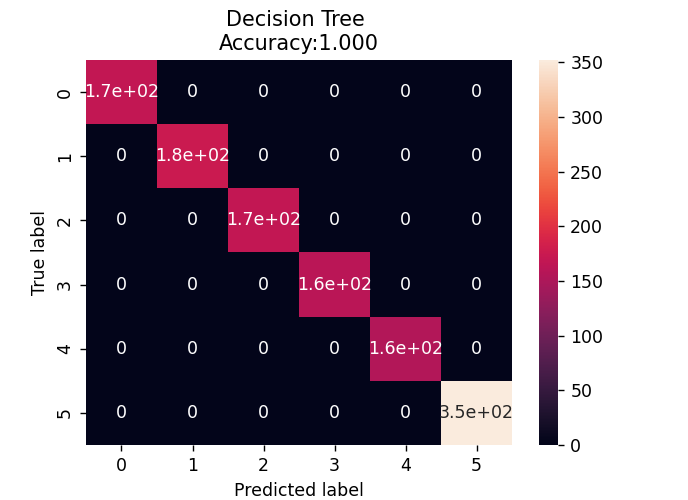

In [60]:
#printing out and displaying the confusion matrix to see where did our model falter
cm=confusion_matrix(faults_test_label,faults_pred_label)

cm_df=pd.DataFrame(cm,index=[0,1,2,3,4,5],columns=[0,1,2,3,4,5])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(faults_test_label, faults_pred_label)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#The model faltered nowhere :O. Let's if it does this well with actual test data too

In [61]:
#loading and looking at the actual test data for which we do not know the target
actual_test=pd.read_csv('test_dataset.csv')
actual_test.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,0,1,1,0,4.745460,-728.197739,725.778428,-0.318639,-0.011551,0.330189
1,1,1,1,1,-525.497721,324.896235,201.390792,-0.046330,0.025836,0.020494
2,0,1,1,1,311.575476,-882.660908,573.243395,-0.027955,-0.013439,0.041393
3,0,1,1,1,875.922025,-542.215104,-331.644062,0.014291,-0.041649,0.027358
4,1,0,0,1,752.530117,20.403523,27.205867,0.144196,-0.472389,0.328194


In [62]:
#taking only required features
actual_features=actual_test[features]
actual_features.head()

,G,C,B,A,Ia,Ib,Ic
0,0,1,1,0,4.745460,-728.197739,725.778428
1,1,1,1,1,-525.497721,324.896235,201.390792
2,0,1,1,1,311.575476,-882.660908,573.243395
3,0,1,1,1,875.922025,-542.215104,-331.644062
4,1,0,0,1,752.530117,20.403523,27.205867


In [63]:
#making predictions
actual_predictions=dt.predict(actual_features)
actual_predictions

array([4, 1, 0, ..., 5, 5, 5], dtype=int64)

In [64]:
#converting the array to an appropriate dataframe
predictions_df=pd.DataFrame(actual_predictions)
predictions_df.index=actual_test.index
predictions_df.columns=['Fault_Type']


,Fault_Type
0,4
1,1
2,0
3,0
4,3


In [65]:
#saving the predictions dataframe as a csv file to be uploaded
predictions_df.to_csv("prediction_results.csv", index = False)